In [172]:
import pandas as pd
import os
import numpy as np

# Merging 12 months of sales data into a single file

In [173]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

list = []

for file in files:
   list.append(pd.read_csv('Sales_Data/'+file))


all_months_data = pd.concat(list, ignore_index = True)

all_months_data.to_csv('all_data.csv', index=False)



#### Read and update

In [174]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Add extra data

### Cleaning data

#### Drop nan data

In [175]:
# dropna() to drop nan values from the data
all_data = all_data.dropna(how='all')

#### Clean Or and Delete

In [183]:
# remove the 'Or' from Data
all_data = all_data[~all_data['Order Date'].str.contains('Or')]

In [188]:
string_price = all_data[all_data['Price Each'].str.contains('14.95')]
string_price.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
43,141276,Lightning Charging Cable,1,14.95,01/21/19 22:23,"63 Cherry St, Los Angeles, CA 90001",1
45,141278,Lightning Charging Cable,1,14.95,01/26/19 12:14,"100 Cherry St, New York City, NY 10001",1
46,141279,Lightning Charging Cable,1,14.95,01/03/19 19:10,"938 14th St, Boston, MA 02215",1
48,141281,Lightning Charging Cable,1,14.95,01/05/19 16:51,"274 2nd St, Atlanta, GA 30301",1


### Some extra work I have done to select the NaN data

In [177]:
data_null = all_data[all_data['Quantity Ordered'].isnull() == True]
#It is other way to extract Nan data 
# You can check the last step using data null, if this data frame is empty, then you already dropped the data null

data_null.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Month column

In [189]:
month = all_data['Order Date'].str[0:2]

all_data['month'] = all_data['Order Date'].str[0:2]

all_data['month'] = all_data['month'].astype('int')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Total Order Value Column

In [200]:
# Transform integerer & float
#all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
#all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# create total value columns

all_data['total_value'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_value
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


Values sales per month

In [205]:
sales_month = all_data.groupby('month').total_value.sum().reset_index()
print(sales_month)

    month   total_value
0       1  1.822257e+06
1       2  2.202022e+06
2       3  2.807100e+06
3       4  3.390670e+06
4       5  3.152607e+06
5       6  2.577802e+06
6       7  2.647776e+06
7       8  2.244468e+06
8       9  2.097560e+06
9      10  3.736727e+06
10     11  3.199603e+06
11     12  4.613443e+06


### Gráph 

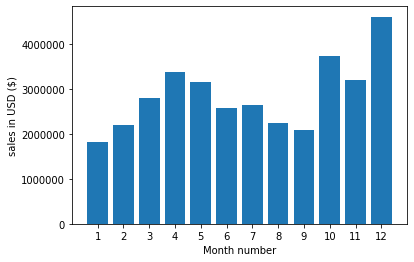

In [210]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,sales_month['total_value'])
plt.xticks(months)
plt.ylabel('sales in USD ($)')
plt.xlabel('Month number')
plt.show()


## What city is the highest number of sales

#### Create City column

In [242]:

#Option 1: using simple operation
# all_data['city'] = all_data['Purchase Address'].str.split(',',expand = True)[1]

#Option 2: Using a function --> Use this one is better 

def get_city(address):
    return address.split(',')[1]

# Because may be we hace duplicates because of the state, we create a function get_state

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' '+ get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_value,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


### Table city vs total values

In [245]:
best_city = all_data.groupby('city').sum()
best_city

,Quantity Ordered,Price Each,month,total_value
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


The answer: San Francisco

In [244]:
sales_city_month = all_data.groupby(['month','city']).total_value.sum().reset_index()
sales_city_month_pivot = sales_city_month.pivot_table(columns = 'city',index = 'month', values = 'total_value')
sales_city_month_pivot

city,Atlanta GA,Austin TX,Boston MA,Dallas TX,Los Angeles CA,New York City NY,Portland ME,Portland OR,San Francisco CA,Seattle WA
month,,,,,,,,,,
1,149159.54,88087.06,201088.49,143462.51,288601.90,260591.29,22708.80,92276.76,435588.33,140692.05
2,176470.30,108787.40,214808.36,186667.99,342061.66,305372.26,29845.49,119606.37,547072.34,171330.25
3,231905.38,154549.27,301023.81,222376.68,429929.37,367262.20,30516.29,156691.72,693726.96,219118.70
4,284448.91,172683.59,353807.11,251360.48,550264.02,449447.75,42536.49,197441.63,812426.19,276254.07
5,238853.99,160635.22,328803.65,268456.49,499689.21,436126.40,57978.76,173729.25,776679.49,211654.29
6,219816.47,144057.29,254747.89,186885.75,451531.93,324148.58,30025.33,139562.02,613173.48,213853.52
7,211766.47,150324.93,291497.14,212325.17,394334.64,355716.10,32421.14,143994.49,642881.76,212513.92
8,169267.66,125713.61,239275.26,179763.46,345893.50,303183.46,35996.60,116881.14,538778.10,189715.09
9,171278.89,106483.70,248408.73,164212.86,354075.69,300563.83,28759.56,103811.88,463595.72,156369.27
